## 일자별 주식 종가 데이터 
## Weekend Effect 검증해보기
- 주말효과(Weekend Effect): 주식시장에서 다른 요일에 비해 월요일 수익률이 낮다는 가설
- 회사의 나쁜 소식을 투자자들의 충동적인 반응을 회피하기 위해 금요일 폐장이후 발표하기 때문에 월요일이 특히 낮을 거라 예상 
- 상위 10개 종목을 골라 요일별 종가의 평균을 내어 가설이 적절한지 분석 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #
sns.set(font_scale = 2.5) #그림그릴 떄 일일이 폰트 하기 귀찮잖아

import missingno as msno #null 데이터를 쉽게 보여주는 라이브러리

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#창말고 노트북에서 보려고

## 데이터 셋 확인

In [2]:
#데이터 셋
df_stock = pd.read_csv('stock.adj_close.csv')

#print(df_stock)

In [3]:
df_stock.shape

(2274, 569)

## 데이터 전처리
- 데이터 보기 쉽게 전치 해주고 컬럼을 항목으로 설정해주자
- 결측값 가진 항목 제거 해주자(상위 10개만 보려하기 때문에 과감하게 제거해도 될듯) 

In [4]:
#전치
df_st_t = df_stock.transpose()
print(df_st_t)

               0        1        2        3        4         5        6     \
Symbol      A000020  A000030  A000040  A000050  A000060   A000070  A000080   
2018-06-01  11550.0  15500.0   2992.0  13200.0  20050.0  120000.0  20200.0   
2018-06-04  11750.0  15950.0   3021.0  13550.0  20050.0  123000.0  20400.0   
2018-06-05  11700.0  16050.0   3025.0  13600.0  20150.0  123500.0  20350.0   
2018-06-07  11650.0  16500.0   3069.0  13800.0  20050.0  124500.0  21000.0   
...             ...      ...      ...      ...      ...       ...      ...   
2020-09-14  26300.0  14800.0    860.0  11300.0  13000.0   67500.0  37300.0   
2020-09-15  25400.0  14800.0    833.0  11300.0  13200.0   66200.0  38500.0   
2020-09-16  25050.0  14800.0    817.0  11050.0  13150.0   65400.0  37950.0   
2020-09-17  25300.0  14800.0    812.0  10900.0  13150.0   64500.0  37150.0   
2020-09-18  25050.0  14800.0    796.0  10750.0  13200.0   64400.0  36850.0   

               7         8        9     ...     2264     2265  

In [7]:
#전치로 안해 바뀐 첫번째 행을 컬럼으로 설정해주자
df_st = df_st_t.rename(columns=df_st_t.iloc[0])
#첫째 행 제거
df_st = df_st.drop(df_st.index[0])
df_st

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [8]:
#결측값 퍼센트 확인
for col in df_st.columns:
    msdf = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 
    100*(df_st[col].isnull().sum()/df_st[col].shape[0]))
    print(msdf)

column:    A000020	 Percent of NaN value: 0.00%
column:    A000030	 Percent of NaN value: 0.00%
column:    A000040	 Percent of NaN value: 0.00%
column:    A000050	 Percent of NaN value: 0.00%
column:    A000060	 Percent of NaN value: 0.00%
column:    A000070	 Percent of NaN value: 0.00%
column:    A000080	 Percent of NaN value: 0.00%
column:    A000100	 Percent of NaN value: 0.00%
column:    A000120	 Percent of NaN value: 0.00%
column:    A000140	 Percent of NaN value: 0.00%
column:    A000150	 Percent of NaN value: 0.00%
column:    A000180	 Percent of NaN value: 0.00%
column:    A000210	 Percent of NaN value: 0.00%
column:    A000220	 Percent of NaN value: 0.00%
column:    A000230	 Percent of NaN value: 0.00%
column:    A000240	 Percent of NaN value: 0.00%
column:    A000250	 Percent of NaN value: 0.00%
column:    A000270	 Percent of NaN value: 0.00%
column:    A000300	 Percent of NaN value: 0.00%
column:    A000320	 Percent of NaN value: 0.00%
column:    A000370	 Percent of NaN value

column:    A019490	 Percent of NaN value: 0.00%
column:    A019540	 Percent of NaN value: 0.00%
column:    A019550	 Percent of NaN value: 0.00%
column:    A019570	 Percent of NaN value: 0.00%
column:    A019590	 Percent of NaN value: 82.04%
column:    A019660	 Percent of NaN value: 0.00%
column:    A019680	 Percent of NaN value: 0.00%
column:    A019770	 Percent of NaN value: 0.00%
column:    A019990	 Percent of NaN value: 0.00%
column:    A020000	 Percent of NaN value: 0.00%
column:    A020120	 Percent of NaN value: 0.00%
column:    A020150	 Percent of NaN value: 0.00%
column:    A020180	 Percent of NaN value: 0.00%
column:    A020400	 Percent of NaN value: 0.00%
column:    A020560	 Percent of NaN value: 0.00%
column:    A020710	 Percent of NaN value: 0.00%
column:    A020760	 Percent of NaN value: 0.00%
column:    A021040	 Percent of NaN value: 0.00%
column:    A021050	 Percent of NaN value: 0.00%
column:    A021080	 Percent of NaN value: 0.00%
column:    A021240	 Percent of NaN valu

column:    A065950	 Percent of NaN value: 0.00%
column:    A066110	 Percent of NaN value: 0.00%
column:    A066130	 Percent of NaN value: 0.00%
column:    A066310	 Percent of NaN value: 0.00%
column:    A066360	 Percent of NaN value: 0.00%
column:    A066410	 Percent of NaN value: 0.00%
column:    A066430	 Percent of NaN value: 0.00%
column:    A066570	 Percent of NaN value: 0.00%
column:    A066590	 Percent of NaN value: 0.00%
column:    A066620	 Percent of NaN value: 0.00%
column:    A066670	 Percent of NaN value: 0.00%
column:    A066700	 Percent of NaN value: 0.00%
column:    A066790	 Percent of NaN value: 0.00%
column:    A066900	 Percent of NaN value: 0.00%
column:    A066910	 Percent of NaN value: 0.00%
column:    A066970	 Percent of NaN value: 0.00%
column:    A066980	 Percent of NaN value: 0.00%
column:    A067000	 Percent of NaN value: 0.00%
column:    A067010	 Percent of NaN value: 0.00%
column:    A067080	 Percent of NaN value: 0.00%
column:    A067160	 Percent of NaN value

column:    A159580	 Percent of NaN value: 0.00%
column:    A159910	 Percent of NaN value: 0.00%
column:    A160550	 Percent of NaN value: 0.00%
column:    A160600	 Percent of NaN value: 0.00%
column:    A160980	 Percent of NaN value: 0.00%
column:    A161000	 Percent of NaN value: 0.00%
column:    A161390	 Percent of NaN value: 0.00%
column:    A161570	 Percent of NaN value: 0.00%
column:    A161580	 Percent of NaN value: 0.00%
column:    A161890	 Percent of NaN value: 0.00%
column:    A163560	 Percent of NaN value: 0.00%
column:    A164060	 Percent of NaN value: 94.89%
column:    A166090	 Percent of NaN value: 0.18%
column:    A166480	 Percent of NaN value: 0.00%
column:    A168330	 Percent of NaN value: 0.00%
column:    A169330	 Percent of NaN value: 90.32%
column:    A170030	 Percent of NaN value: 0.00%
column:    A170790	 Percent of NaN value: 0.00%
column:    A170900	 Percent of NaN value: 0.00%
column:    A170920	 Percent of NaN value: 0.00%
column:    A171010	 Percent of NaN val

column:    A355150	 Percent of NaN value: 99.82%
column:    A357120	 Percent of NaN value: 97.71%
column:    A357780	 Percent of NaN value: 94.89%
column:    A900040	 Percent of NaN value: 0.00%
column:    A900070	 Percent of NaN value: 0.00%
column:    A900080	 Percent of NaN value: 0.00%
column:    A900090	 Percent of NaN value: 24.12%
column:    A900100	 Percent of NaN value: 0.00%
column:    A900110	 Percent of NaN value: 0.00%
column:    A900120	 Percent of NaN value: 0.00%
column:    A900140	 Percent of NaN value: 0.00%
column:    A900250	 Percent of NaN value: 0.00%
column:    A900260	 Percent of NaN value: 0.00%
column:    A900270	 Percent of NaN value: 0.00%
column:    A900280	 Percent of NaN value: 0.00%
column:    A900290	 Percent of NaN value: 0.00%
column:    A900300	 Percent of NaN value: 0.00%
column:    A900310	 Percent of NaN value: 0.00%
column:    A900340	 Percent of NaN value: 21.65%
column:    A950110	 Percent of NaN value: 0.00%
column:    A950130	 Percent of NaN 

In [9]:
df_st.shape

(568, 2274)

In [10]:
#결측값 가진 항목 제거
df_stock_dr = df_st.dropna(axis = 1)

In [11]:
df_stock_dr.shape

(568, 1996)

In [20]:
df_stock_dr.info()
#요약값을 보니 오브젝트 타입으로 나타나니 'float'형으로 바꾸자


<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 2018-06-01 to 2020-09-18
Columns: 1996 entries, A000020 to A950170
dtypes: object(1996)
memory usage: 8.7+ MB


In [21]:
df_stock_as = df_stock_dr.astype('float')

In [22]:
df_stock_as.describe()

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900270,A900280,A900290,A900300,A900310,A950110,A950130,A950140,A950160,A950170
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,10772.385563,15166.373239,1710.778169,10980.035211,18234.559859,74683.450704,25032.922535,45960.070423,153964.788732,11446.338028,...,1089.137324,602.889085,2052.204225,2016.503521,1901.197183,10246.021127,5054.436620,5039.014085,20707.077465,7361.021127
std,4399.832527,658.304338,686.662598,1431.687747,3550.152018,18951.626644,8339.246510,6395.219943,12684.948918,4288.742777,...,270.256020,270.617786,402.600134,832.231826,405.014843,2726.117591,6278.285809,785.910876,14541.798791,2178.243515
min,4985.000000,14550.000000,441.000000,6850.000000,9180.000000,32500.000000,15300.000000,30688.000000,118500.000000,6460.000000,...,434.000000,196.000000,917.000000,623.000000,776.000000,5540.000000,1640.000000,2495.000000,8010.000000,3010.000000
25%,8237.500000,14800.000000,945.500000,9975.000000,15037.500000,61400.000000,17950.000000,42103.500000,145000.000000,8067.500000,...,870.250000,328.000000,1770.000000,1195.000000,1645.000000,7927.500000,2872.500000,4665.000000,9540.000000,6150.000000
50%,9635.000000,14800.000000,2030.000000,10800.000000,18650.000000,71900.000000,21725.000000,44429.000000,154500.000000,9805.000000,...,1110.000000,661.500000,2080.000000,1967.500000,1835.000000,9925.000000,4025.000000,4920.000000,9540.000000,7330.000000
75%,10900.000000,15425.000000,2168.000000,11612.500000,21050.000000,85450.000000,29400.000000,47293.250000,161500.000000,13562.500000,...,1240.000000,828.250000,2355.000000,2725.000000,2050.000000,12200.000000,4311.250000,5330.000000,38162.500000,8457.500000
max,30300.000000,17150.000000,3069.000000,14550.000000,25600.000000,125000.000000,46500.000000,69200.000000,190500.000000,24250.000000,...,1835.000000,1161.000000,2850.000000,3540.000000,3245.000000,18000.000000,49750.000000,8000.000000,49900.000000,14450.000000


In [54]:
#종가 평균값 상위 10개 데이터 확인
df_stock_m= df_stock_as.mean().sort_values(ascending = False).iloc[:10]
df_stock_m

A051900    1.284468e+06
A003240    1.169468e+06
A000670    6.550766e+05
A007310    6.521805e+05
A036570    5.558926e+05
A002270    5.349842e+05
A003920    5.028512e+05
A207940    4.474481e+05
A010130    4.178609e+05
A086900    3.887481e+05
dtype: float64

In [58]:
#종가 평균 상위 10개 데이터 프레임 생성
df_10  = df_stock_as.loc[:,['A051900','A003240','A000670','A007310','A036570',
                         'A002270','A003920','A207940','A010130','A086900',]]
df_10

,A051900,A003240,A000670,A007310,A036570,A002270,A003920,A207940,A010130,A086900
2018-06-01,1385000.0,1276000.0,810000.0,857000.0,363500.0,724000.0,656000.0,451500.0,418500.0,698953.0
2018-06-04,1362000.0,1303000.0,814000.0,855000.0,363500.0,748000.0,653000.0,419000.0,421500.0,697506.0
2018-06-05,1381000.0,1326000.0,816000.0,846000.0,356500.0,741000.0,658000.0,421000.0,416500.0,691810.0
2018-06-07,1420000.0,1357000.0,840000.0,890000.0,353000.0,765000.0,669000.0,420000.0,431000.0,688645.0
2018-06-08,1392000.0,1326000.0,834000.0,888000.0,365000.0,769000.0,668000.0,421000.0,428500.0,671736.0
...,...,...,...,...,...,...,...,...,...,...
2020-09-14,1519000.0,695000.0,485000.0,590000.0,830000.0,309500.0,270000.0,763000.0,405000.0,234100.0
2020-09-15,1533000.0,687000.0,487500.0,586000.0,824000.0,308000.0,271000.0,773000.0,401500.0,236300.0
2020-09-16,1506000.0,684000.0,489500.0,585000.0,822000.0,309000.0,270000.0,776000.0,397500.0,232600.0
2020-09-17,1508000.0,694000.0,487500.0,578000.0,805000.0,307500.0,270000.0,757000.0,394500.0,225600.0


In [72]:
#날짜 인덱스를 오브젝트 형식이 아닌 데이트타임으로 변경 (계산하기 편하려고)
index = pd.to_datetime(df_10.index)
df_10 = df_10.set_index(index)
df_10.index

DatetimeIndex(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-14',
               '2018-06-15', '2018-06-18',
               ...
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', length=568, freq=None)

Text(0.5, 1.0, 'weekday return anomaly')

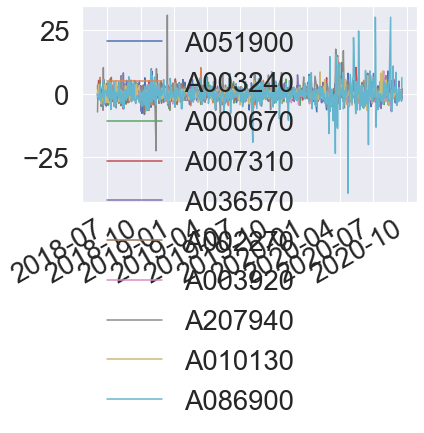

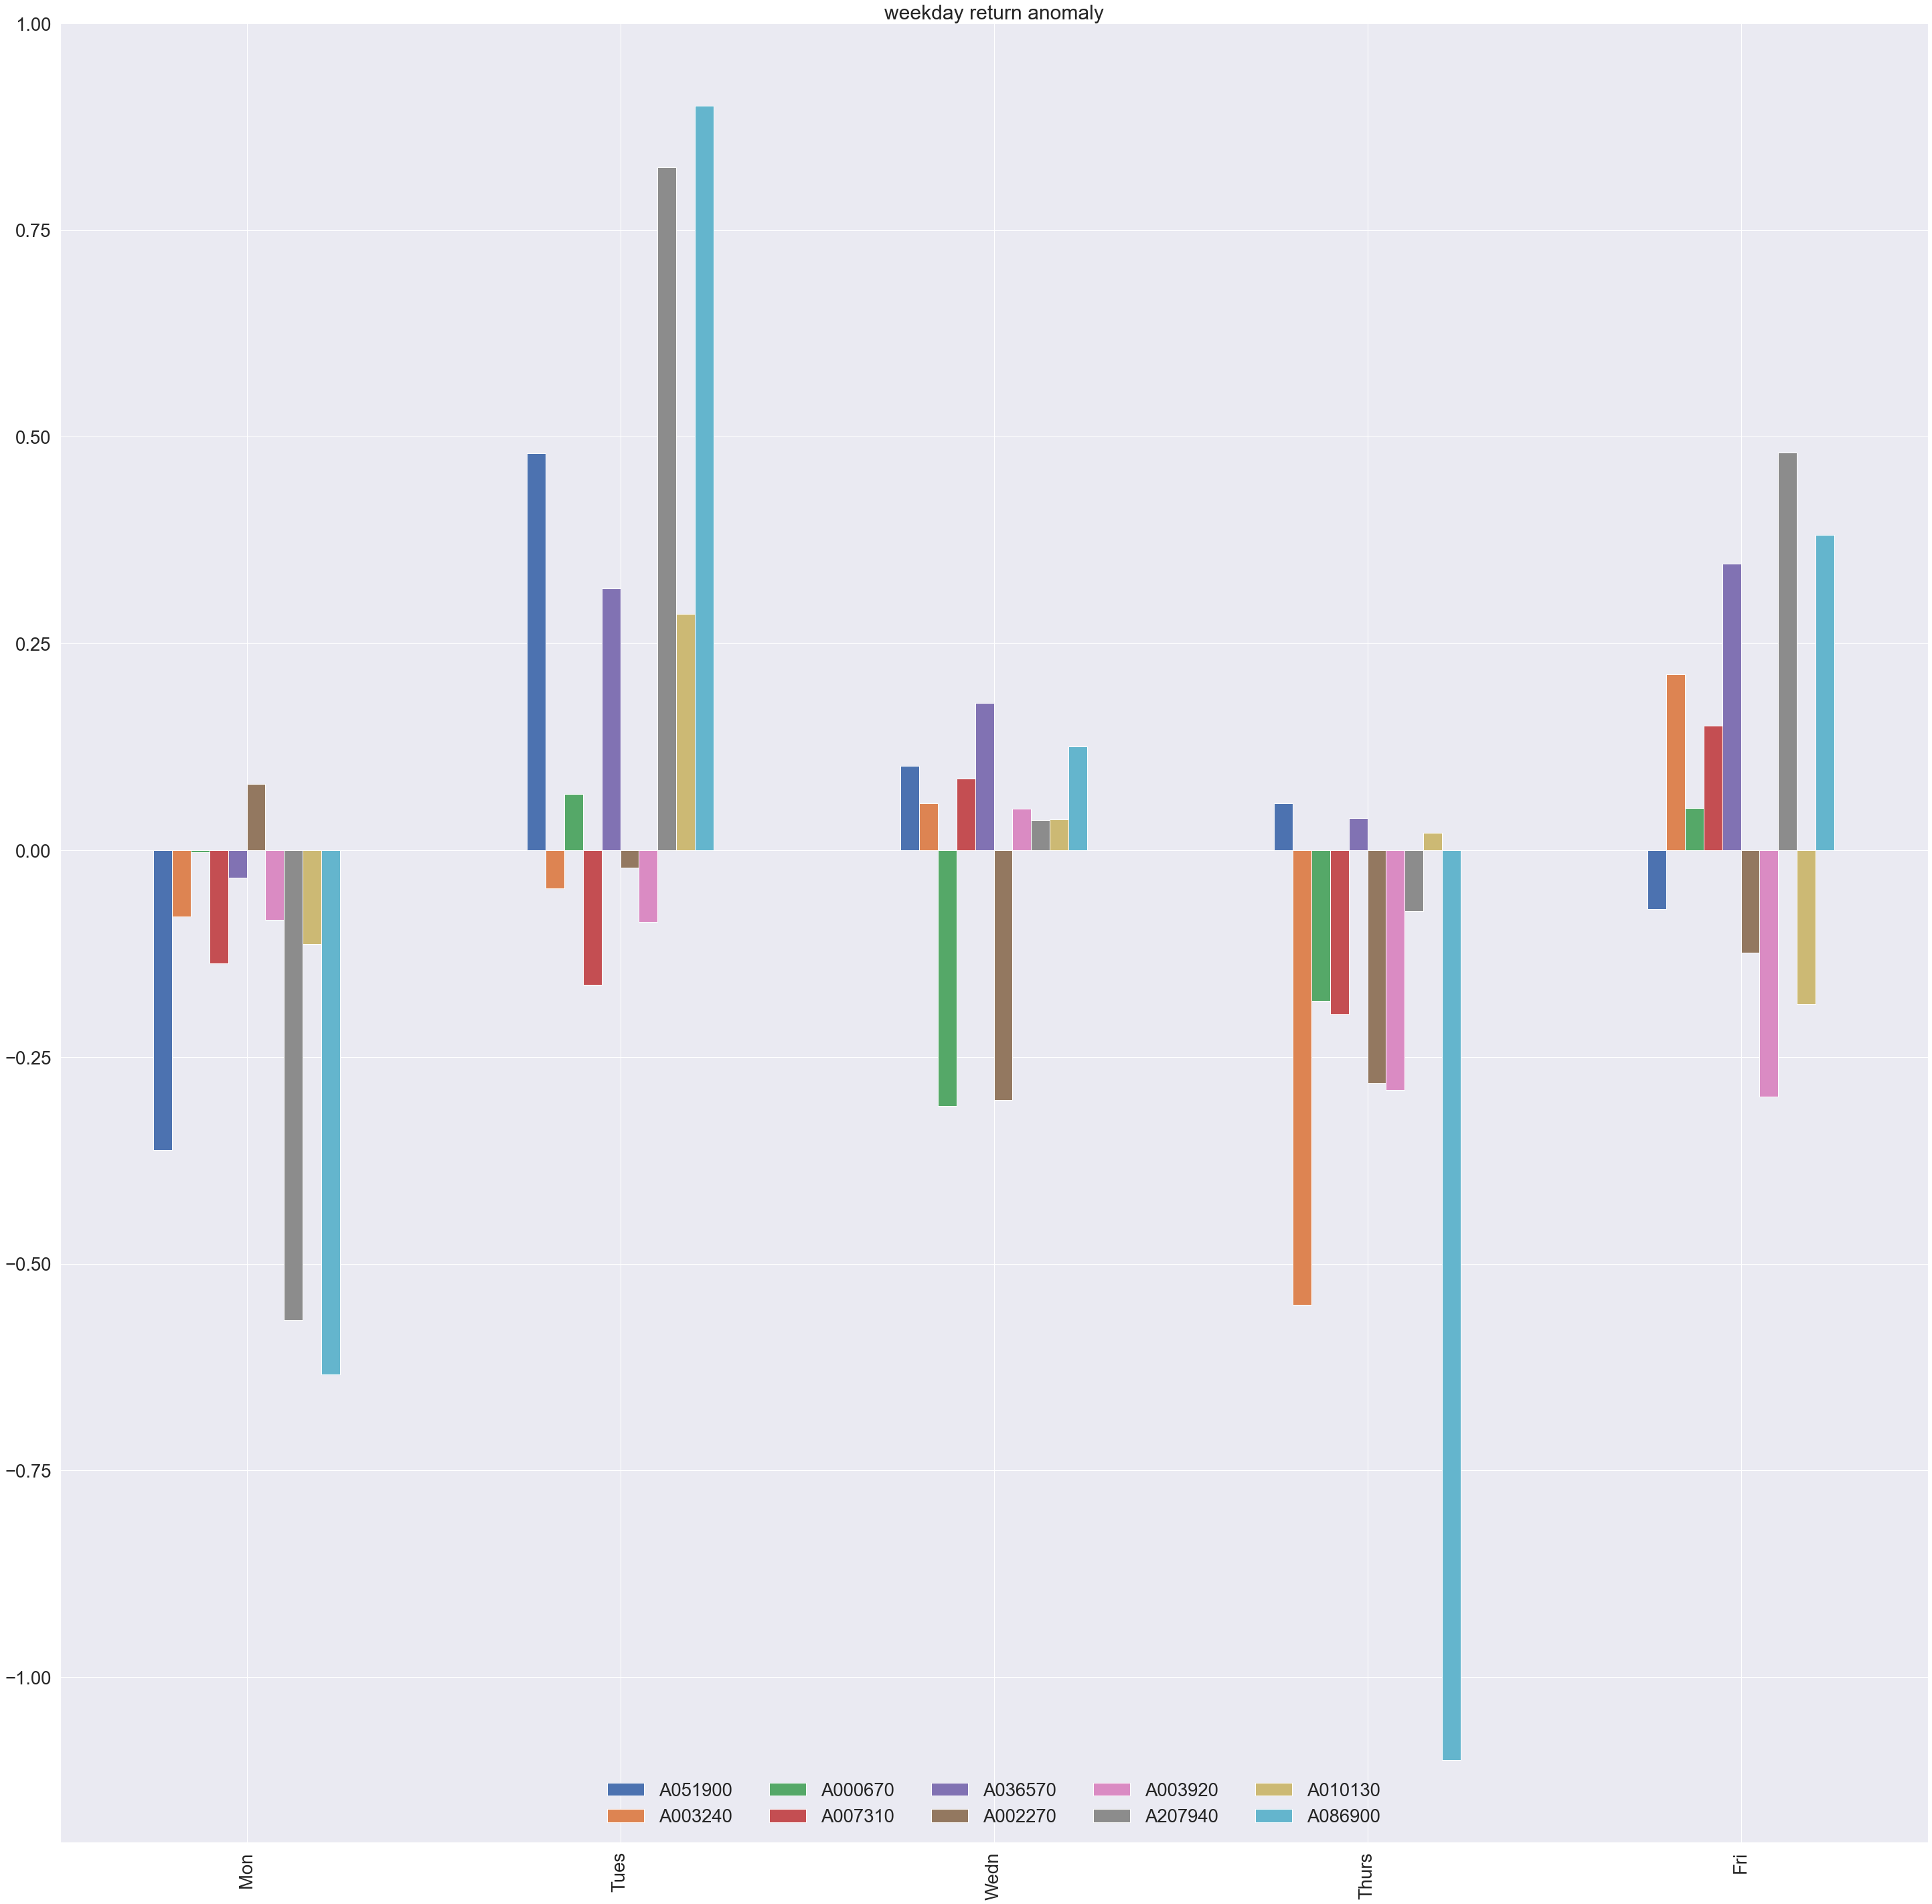

In [79]:
#주말효과를 알기 위해 날짜의 요일을 생성해주자
#수익률을 먼저 생성 (종가 - 전 종가), pct_change()함수 사용
df_pct = 100* df_10.pct_change()
df_pct.plot()

weekday =  df_pct.groupby(df_pct.index.dayofweek).mean()
weekday.index = ['Mon', 'Tues','Wedn','Thurs','Fri']


weekday.plot(figsize = (50,50), kind = 'bar')
plt.legend(loc = 'lower center', ncol = 5, frameon = False)
plt.xticks = weekday.index
plt.title('weekday return anomaly')